In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


In [9]:
# Load the Titanic dataset from a URL or local file
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Show the first few rows of the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Fill missing numerical data with the mean
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill missing 'Embarked' values with the most frequent value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop irrelevant features
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical features into numerical ones
# 'Sex' can be encoded as 0 (female) and 1 (male)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# 'Embarked' can be encoded with a custom mapping
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Show the cleaned dataset
print(df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


In [11]:
# Define the features (X) and the target variable (y)
X = df.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = df['Survived']  # Target variable (Survived column)


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the train and test data
print(X_train.shape, X_test.shape)


(712, 8) (179, 8)


In [13]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8212
Confusion Matrix:
[[92 13]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


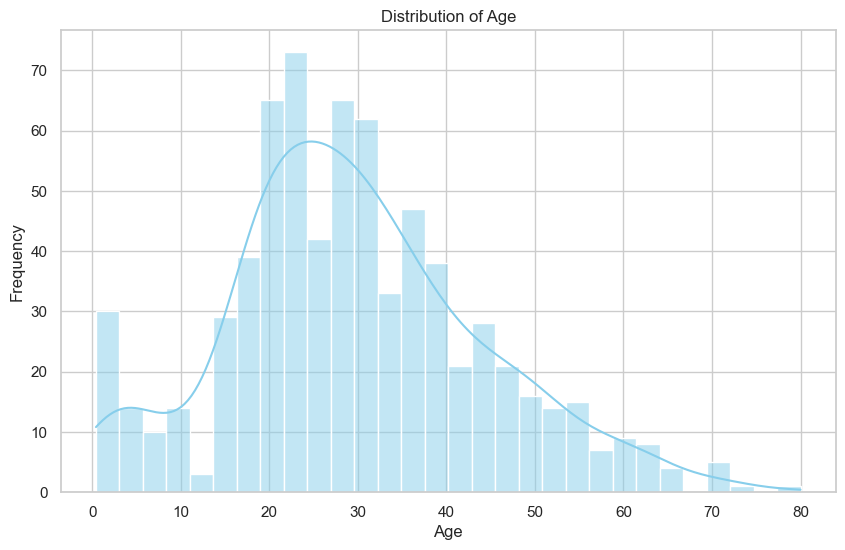

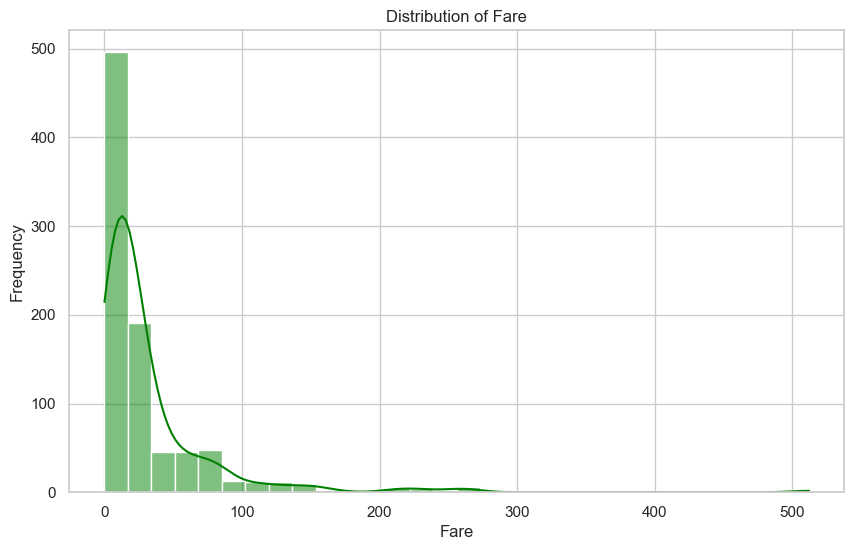

C:\Users\kusha\AppData\Local\Temp\ipykernel_1684\3511632540.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


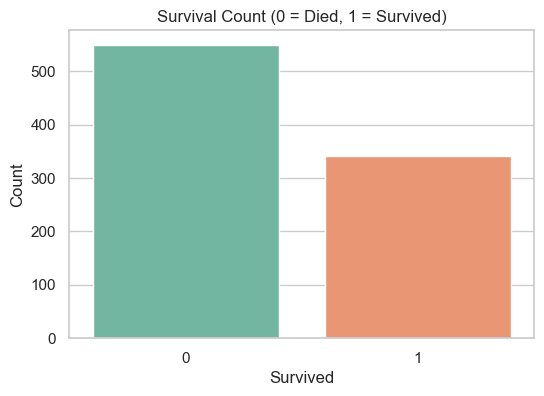

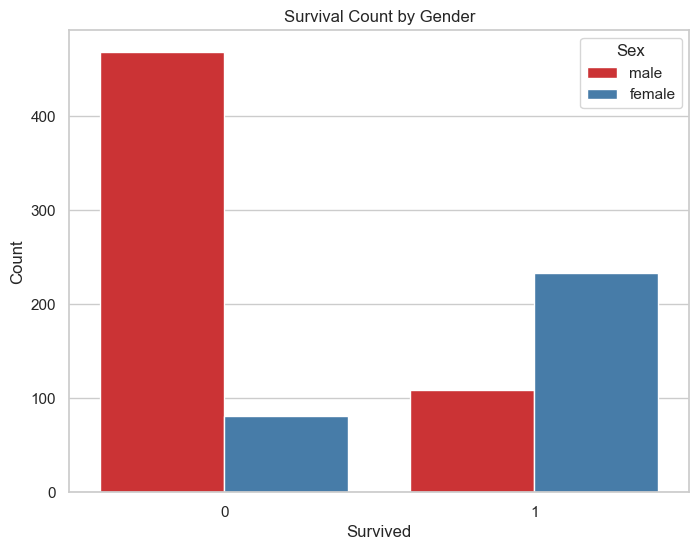

C:\Users\kusha\AppData\Local\Temp\ipykernel_1684\3511632540.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')


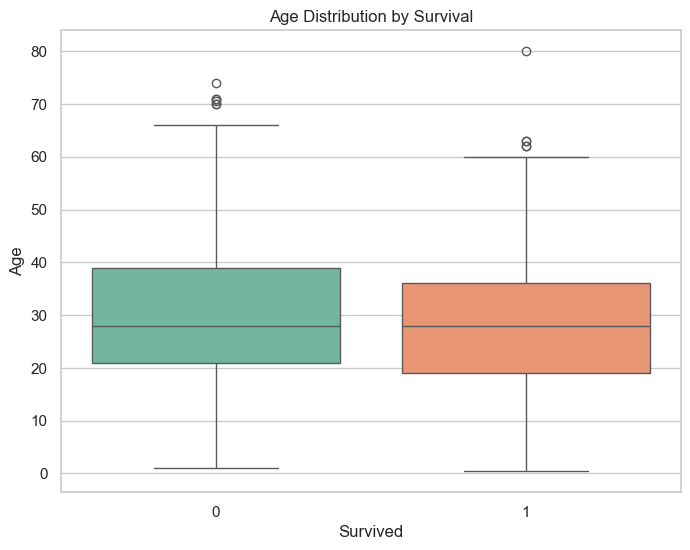

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [16]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Load the Titanic dataset (if not already loaded)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Step 1: Plot the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 2: Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=30, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Step 3: Countplot for 'Survived' variable (Survival vs. Not Survived)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Step 4: Countplot for 'Survived' by 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Step 5: Boxplot of 'Age' vs. 'Survived'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Step 6: Heatmap of correlation between numeric features
# First, calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 7: Countplot for 'Survived' by 'Pclass' (Ticket Class)
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set3')
plt.title('Survival Count by Ticket Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Step 8: Violin plot for 'Age' vs. 'Pclass' (Age distribution by Ticket Class)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Ticket Class')
plt.xlabel('Pclass (Ticket Class)')
plt.ylabel('Age')
plt.show()

# Step 9: Heatmap of missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()
